<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [2]:
!pip install html5lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 20.8 MB/s eta 0:00:00


The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here

from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np

Download the webpage at the url


In [4]:
#your code goes here

data  = requests.get(url).text

Create a soup object


In [5]:
#your code goes here

soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here

table = soup.find('table')
languages = []
salaries = []

for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    languages.append(columns[1].text)
    salaries.append(columns[3].text)

df = pd.DataFrame({'Language': languages, 'Average Annual Salary': salaries})
print(df)

     Language Average Annual Salary
0      Python              $114,383
1        Java              $101,013
2           R               $92,037
3  Javascript              $110,981
4       Swift              $130,801
5         C++              $113,865
6          C#               $88,726
7         PHP               $84,727
8         SQL               $84,793
9          Go               $94,082


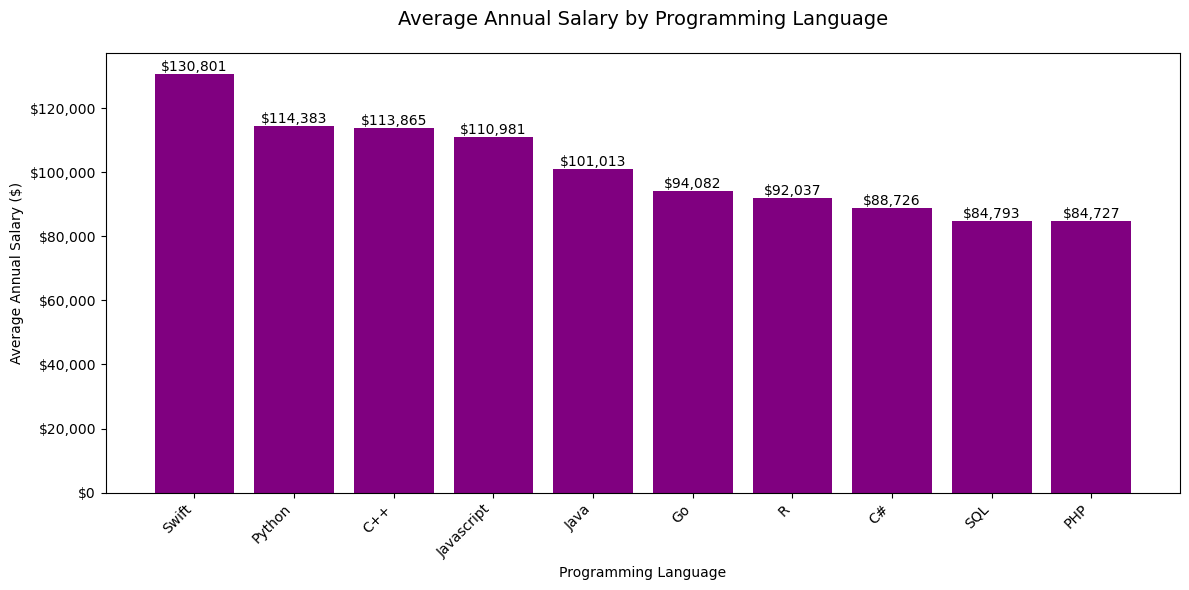

In [7]:
# additional for presentation
# In Module 1 you have collected the job postings data using web scraping in a file named “popular-languages.csv”. Present that data using a bar chart here. Order the bar chart in the descending order of salary.​

import pandas as pd
import matplotlib.pyplot as plt

# Create dataframe from the salary data
data = {
    'Language': ['Swift', 'Python', 'C++', 'Javascript', 'Java', 'Go', 'R', 'C#', 'SQL', 'PHP'],
    'Salary': [130801, 114383, 113865, 110981, 101013, 94082, 92037, 88726, 84793, 84727]
}
df = pd.DataFrame(data)

# Sort values in descending order
df = df.sort_values('Salary', ascending=False)

# Create figure and axis with specific size
plt.figure(figsize=(12, 6))

# Create bar chart
bars = plt.bar(df['Language'], df['Salary'], color='purple')

# Customize the chart
plt.title('Average Annual Salary by Programming Language', fontsize=14, pad=20)
plt.xlabel('Programming Language')
plt.ylabel('Average Annual Salary ($)')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

# Format y-axis with dollar signs and commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Save the scrapped data into a file named *popular-languages.csv*


In [8]:
# your code goes here

df.to_csv('popular-languages.csv', index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
